# Music of the spheres
## General Physics Group Project

General imports

In [1]:
#Requires midiutil (saving) and pygame (playing) packages, available from pip
from os import environ
environ['PYGAME_HIDE_SUPPORT_PROMPT'] = '1' #Prevents pygame welcome message
import numpy as np
from midiutil.MidiFile import MIDIFile
import matplotlib.pyplot as plt
import pygame, pygame.mixer
from time import sleep
import ephem
AU = 1.495978707e11 #in m

Planet class definition

In [2]:
Mkm_to_AU= 0.00668458712
def dist_from_point(x1,y1,x0,y0):
   return np.sqrt((x0-x1)**2+(y0-y1)**2)

class Planet: #RETURNS ALL VALUES IN AU
    def __init__(self, name,orbital_data):
        self.name = name
        self.semi_major_axis = orbital_data[0]*Mkm_to_AU
        self.semi_minor_axis = (orbital_data[0])*np.sqrt(1-orbital_data[1]**2)*Mkm_to_AU
        self.eccentricity = orbital_data[1]
        self.period = orbital_data[2]
    
    def plot_ellipse(self):
        x0 = self.semi_major_axis*self.eccentricity #Position of focus (sun)
        y0 = 0
        N = int(self.period) -1
        t = np.linspace(0, 2*np.pi, N)
        x_range = x0+self.semi_major_axis*np.cos(t)
        y_range = y0+self.semi_minor_axis*np.sin(t)
        return x_range,y_range
    
    def plot_distance(self):
        x0 = self.semi_major_axis*self.eccentricity #Position of focus (sun)
        y0 = 0
        N = int(self.period) -1
        t = np.linspace(0, 2*np.pi, N)
        x_range = self.semi_major_axis*np.cos(t) #x0+self.semi_major_axis*np.cos(t)
        y_range = self.semi_minor_axis*np.sin(t)
        t_range = (t/(np.pi*2))*self.period
        return t_range, dist_from_point(x_range,y_range,x0,y0)
     
    def get_min_max_distance_from_sun(self):
        dist_array = self.plot_distance()[1]
        min_dist = np.min(dist_array)
        max_dist = np.max(dist_array)
        return min_dist,max_dist
    
    def get_peri_aphelion(self):
        perihelion = self.semi_major_axis*(1-self.eccentricity)
        aphelion = self.semi_major_axis*(1+self.eccentricity)
        return perihelion,aphelion
    
    def get_current_distance(self):
        if self.name == "Earth":
            observer = ephem.Observer()
            observer.date = ephem.now()
            observer.lat = '0'
            observer.lon = '0'
        
            sun = ephem.Sun()
            sun.compute(observer)
        
            distance_au = ephem.separation(sun, observer)
        else:
            planet = getattr(ephem, self.name)()
            planet.compute()
            distance_au = planet.sun_distance
        
        return distance_au


Initialise planet data

In [3]:
#data from https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
# [semi-major axis (x10^6 km), eccentricity, period (days)]
mercury_data = [57.909, 0.2056, 87.969]
venus_data = [108.210, 0.0068, 224.701]
mars_data = [227.956, 0.0935, 686.980]
earth_data = [149.598, 0.0167, 365.256] 
jupiter_data = [778.479, 0.0487, 4332.589]
saturn_data = [1432.041, 0.0520, 10759.22]
uranus_data = [2867.043, 0.0469, 30685.4]
neptune_data = [4514.953, 0.0097, 60189]
pluto_data = [5869.656, 0.2444, 90560]

Mercury = Planet("Mercury",mercury_data)
Venus = Planet("Venus",venus_data)
Earth = Planet("Earth",earth_data)
Mars = Planet("Mars",saturn_data)
Jupiter = Planet("Jupiter",jupiter_data)
Saturn = Planet("Saturn",saturn_data)
Uranus = Planet("Uranus",uranus_data)
Neptune = Planet("Neptune",neptune_data)
Pluto = Planet("Pluto",pluto_data)

Planets = [Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune, Pluto]
planet_names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

Current distances

In [4]:
for i,planet in enumerate(Planets): 
    print(f"The distance between the Sun and {planet.name} is {planet.get_current_distance():.2f} AU.")

The distance between the Sun and Mercury is 0.40 AU.
The distance between the Sun and Venus is 0.72 AU.
The distance between the Sun and Earth is 0.55 AU.
The distance between the Sun and Mars is 1.66 AU.
The distance between the Sun and Jupiter is 4.95 AU.
The distance between the Sun and Saturn is 9.81 AU.
The distance between the Sun and Uranus is 19.65 AU.
The distance between the Sun and Neptune is 29.91 AU.
The distance between the Sun and Pluto is 34.75 AU.


Plot orbit of planets

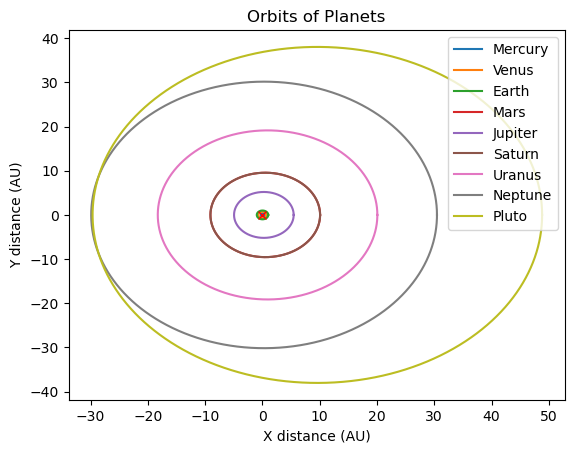

In [5]:
x_total = [] #np.empty((len(Planets)))
y_total = [] #np.empty((len(Planets)))
t_total = [] #np.empty((len(Planets)))
dist_total = [] #np.empty((len(Planets)))
 
#plt.axes().set_aspect('equal')
for i,planet in enumerate(Planets):
    x,y = planet.plot_ellipse()
    x_total.append(x)
    y_total.append(y)
    plt.plot(x,y)
    
plt.plot(0,0,"rx")
plt.title("Orbits of Planets")
plt.xlabel("X distance (AU)")
plt.ylabel("Y distance (AU)")
plt.legend(planet_names)
plt.show()

Plot planet-sun distance over time

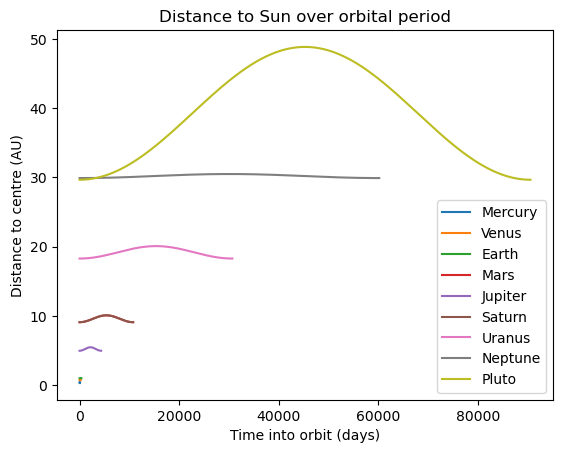

In [6]:
for i,planet in enumerate(Planets):
    t,d = planet.plot_distance()
    t_total.append(t)
    dist_total.append(d)
    plt.plot(t,d)
    
plt.title("Distance to Sun over orbital period")
plt.xlabel("Time into orbit (days)")
plt.ylabel("Distance to centre (AU)")
plt.legend(planet_names)
plt.show()

Min and max distance to sun from planet's orbit

In [7]:
#Note - this should give the same values as perihelion and aphelion
for i,planet in enumerate(Planets):
    name = planet.name
    min_dist = np.min(dist_total[i])
    max_dist = np.max(dist_total[i])
    print(f"{planet.name}: Min distance: {min_dist:3.2f} AU. Max distance: {max_dist:3.2f} AU.")

Mercury: Min distance: 0.31 AU. Max distance: 0.47 AU.
Venus: Min distance: 0.72 AU. Max distance: 0.73 AU.
Earth: Min distance: 0.98 AU. Max distance: 1.02 AU.
Mars: Min distance: 9.07 AU. Max distance: 10.07 AU.
Jupiter: Min distance: 4.95 AU. Max distance: 5.46 AU.
Saturn: Min distance: 9.07 AU. Max distance: 10.07 AU.
Uranus: Min distance: 18.27 AU. Max distance: 20.06 AU.
Neptune: Min distance: 29.89 AU. Max distance: 30.47 AU.
Pluto: Min distance: 29.65 AU. Max distance: 48.83 AU.


Min and max distance to sun from planet's orbit (using parameters of ellipse to calculate focus)

In [8]:
for i,planet in enumerate(Planets):
    name = planet.name
    min_dist,max_dist = planet.get_peri_aphelion()
    print(f"{planet.name}: Perihelion: {min_dist:3.2f} AU. Aphelion: {max_dist:3.2f} AU.")

Mercury: Perihelion: 0.31 AU. Aphelion: 0.47 AU.
Venus: Perihelion: 0.72 AU. Aphelion: 0.73 AU.
Earth: Perihelion: 0.98 AU. Aphelion: 1.02 AU.
Mars: Perihelion: 9.07 AU. Aphelion: 10.07 AU.
Jupiter: Perihelion: 4.95 AU. Aphelion: 5.46 AU.
Saturn: Perihelion: 9.07 AU. Aphelion: 10.07 AU.
Uranus: Perihelion: 18.27 AU. Aphelion: 20.06 AU.
Neptune: Perihelion: 29.89 AU. Aphelion: 30.47 AU.
Pluto: Perihelion: 29.65 AU. Aphelion: 48.83 AU.


Calculate tension/mass density ratio and spring constant based on range from A0 (27.5Hz) to C8 (4186Hz)

In [9]:
def get_t_mu():
    #Need pluto min distance to give A0, 27.5Hz
    t_mu = (27.5*2*Pluto.get_peri_aphelion()[0]*AU)**2
    return t_mu

def get_k(t,mu):
    x_min = Mercury.get_peri_aphelion()[0]*AU
    x_max = Mercury.get_peri_aphelion()[1]*AU
    t_mu = t/mu
    dx = x_max-x_min
    k = (  mu/dx  )  *  (x_min/(x_max+dx))  *  ((2*4186*x_max)**2-t_mu*(x_min/(x_max+dx)))
    return k

T_mu_orig = get_t_mu()
mu_original = 100 # original linear mass density in kg/m
T_original = T_mu_orig*mu_original # Original tension in N
k = get_k(T_original,mu_original) #spring constant

print(f"T/mu ratio needs to be {get_t_mu():3.5e}")
print(f"mu is selected to be {mu_original:3.5e}, resulting in T being {T_original:3.5e}")
print(f"k needs to be {k:3.5e}")

T/mu ratio needs to be 5.95024e+28
mu is selected to be 1.00000e+02, resulting in T being 5.95024e+30
k needs to be 6.44596e+20


Converting distance to frequency to a note

In [10]:
def T(distance,planet):
    min_distance =planet.get_peri_aphelion()[0]*AU
    delta_x = np.abs(distance-min_distance)
    tension = k*delta_x +T_original
    return tension

def mu(distance,planet):
    min_distance  =planet.get_peri_aphelion()[0]*AU
    delta_x = np.abs(distance-min_distance)
    density = mu_original * (min_distance)/(min_distance+delta_x)
    return density
    
def frequency(distance, planet):
    m_distance = distance*AU
    return np.power(T(m_distance,planet) / mu(m_distance,planet), 1/2) / (2 * m_distance)

def freq_to_note(freq):
    notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

    note_number = 12 * np.log2(freq / 440) + 49  
    note_number = round(note_number)
        
    note = (note_number - 1 ) % len(notes)
    note = notes[note]
    
    octave = (note_number + 8 ) // len(notes)
    
    return note, octave

def midi_pitch_number(freq):
    m  =  12 * np.log2(freq/440) + 69
    return m

Plotting range of frequencies achieved by each planet over its orbit

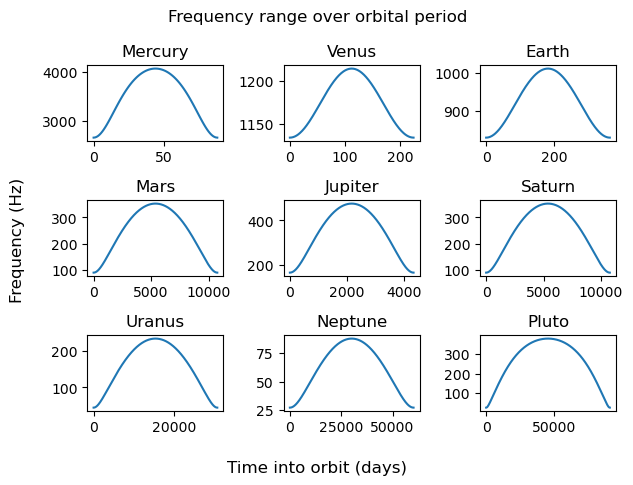

In [11]:
freq_total = []
fig, axes = plt.subplots(3,3)

for i,planet in enumerate(Planets):
    f = frequency(dist_total[i], planet)
    freq_total.append(f)
    #print(planet.name,min(f),max(f))
    sub = plt.subplot(3,3,i+1)
    sub.plot(t_total[i],f)
    sub.set_title(planet.name)
    
fig.suptitle("Frequency range over orbital period")
fig.supxlabel("Time into orbit (days)")
fig.supylabel("Frequency (Hz)")
fig.tight_layout()
plt.show()

Plot of all frequency ranges on one graph

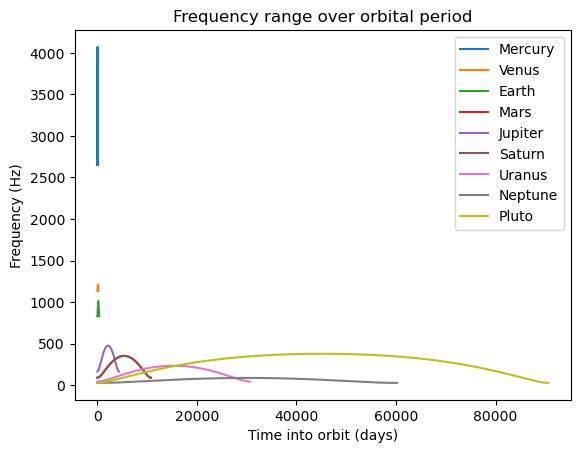

In [12]:
for i,planet in enumerate(Planets):
    plt.plot(t_total[i],freq_total[i])
    
plt.title("Frequency range over orbital period")
plt.xlabel("Time into orbit (days)")
plt.ylabel("Frequency (Hz)")
plt.legend(planet_names)
plt.show()

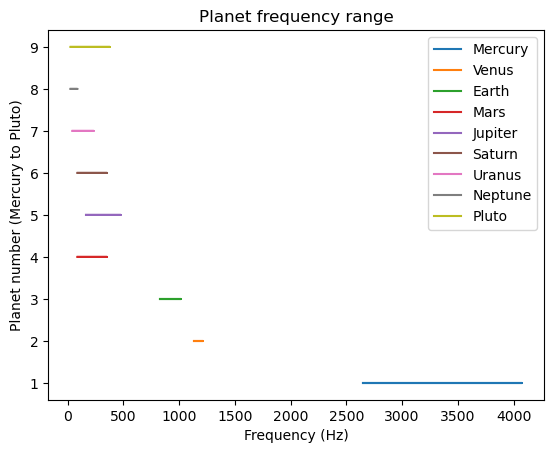

In [13]:
for i,planet in enumerate(Planets):
    plt.plot(freq_total[i],np.full(np.size(freq_total[i]),i+1))
    
plt.title("Planet frequency range")
plt.ylabel("Planet number (Mercury to Pluto)")
plt.xlabel("Frequency (Hz)")
plt.legend(planet_names)
plt.show()

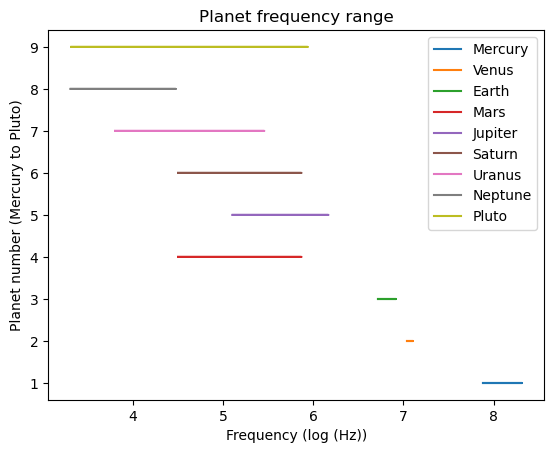

In [14]:
for i,planet in enumerate(Planets):
    plt.plot(np.log(freq_total[i]),np.full(np.size(freq_total[i]),i+1))
    
plt.title("Planet frequency range")
plt.ylabel("Planet number (Mercury to Pluto)")
plt.xlabel("Frequency (log (Hz))")
plt.legend(planet_names)
plt.show()

Display min and max frequencies as notes

In [15]:
min_notes = []
max_notes = []

def get_notes_properties(freq):
    midi = midi_pitch_number(freq)
    note, octave = freq_to_note(freq)
    return freq, note, octave, midi

def display_notes(notes):
    for i,planet in enumerate(Planets):
        print(f"{planet.name}: Note: {notes[i][1]}, Octave: {notes[i][2]}")

for planet in Planets:
    min_freq = frequency(planet.get_peri_aphelion()[0],planet) #min distance
    max_freq = frequency(planet.get_peri_aphelion()[1],planet) #min distance
    min_notes.append(get_notes_properties(min_freq))
    max_notes.append(get_notes_properties(max_freq))

print("Notes at minimum planet-sun distance")
display_notes(min_notes)

print("\nNotes at maximum planet-sun distance")
display_notes(max_notes)

Notes at minimum planet-sun distance
Mercury: Note: E, Octave: 7
Venus: Note: C#, Octave: 6
Earth: Note: G#, Octave: 5
Mars: Note: F, Octave: 2
Jupiter: Note: E, Octave: 3
Saturn: Note: F, Octave: 2
Uranus: Note: F, Octave: 1
Neptune: Note: A, Octave: 0
Pluto: Note: A, Octave: 0

Notes at maximum planet-sun distance
Mercury: Note: C, Octave: 8
Venus: Note: D#, Octave: 6
Earth: Note: B, Octave: 5
Mars: Note: F, Octave: 4
Jupiter: Note: A#, Octave: 4
Saturn: Note: F, Octave: 4
Uranus: Note: A#, Octave: 3
Neptune: Note: F, Octave: 2
Pluto: Note: F#, Octave: 4


Today's notes

In [16]:
todays_notes = []
for planet in Planets:
    today_freq = frequency(planet.get_current_distance(),planet)
    todays_notes.append(get_notes_properties(today_freq))

print("Notes at today's planet-sun distance")
display_notes(todays_notes)

Notes at today's planet-sun distance
Mercury: Note: A#, Octave: 7
Venus: Note: C#, Octave: 6
Earth: Note: D#, Octave: 8
Mars: Note: A#, Octave: 8
Jupiter: Note: E, Octave: 3
Saturn: Note: D#, Octave: 4
Uranus: Note: G#, Octave: 3
Neptune: Note: C, Octave: 1
Pluto: Note: A#, Octave: 3


Code to make a MIDI file

In [17]:
def create_midi_file(notes,midi_path):
    mf = MIDIFile(1)     # only 1 track
    track = 0   # the only track

    time = 0    # start at the beginning
    mf.addTrackName(track, time, "Sample Track")
    mf.addTempo(track, time, 120)

    # add some notes
    channel = 0
    volume = 50

    for _, _, _, midi in notes:
        
        pitch = round(midi) 
        time = 0 
        duration = 3 
        mf.addNote(track, channel, pitch, time, duration, volume)

    with open(midi_path, 'wb') as outf:
        mf.writeFile(outf)

Code to play a midi file, plays min and max chord

In [18]:
def play_chord(midi_path):
    pygame.init()
    pygame.mixer.init()
    pygame.mixer.music.load(midi_path)
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        sleep(1)

In [19]:
create_midi_file(min_notes,"min_chord.midi")
play_chord("min_chord.midi")

In [20]:
create_midi_file(max_notes,"max_chord.midi")
play_chord("max_chord.midi")

In [21]:
create_midi_file(todays_notes,"today_chord.midi")
play_chord("today_chord.midi")

Plays the first 30 days of chords

In [22]:
def write_track():
    mf = MIDIFile(1)     # only 1 track
    track = 0   # the only track
    time=0
    mf.addTrackName(track, time, "Sample Track")
    mf.addTempo(track, time, 120)
    # add some notes
    channel = 0
    volume = 100

    for day in range(0,30): #Note - not actually days as every planet has its period split into 100 steps
        day_notes = []
        for i,planet in enumerate(Planets):
            day_freq = frequency(dist_total[i][day],planet) #Distance at time "day"
            day_notes.append(get_notes_properties(day_freq))

        for _, _, _, midi in day_notes:
        
            pitch = round(midi) 
            time = day +.5
            duration = 1
            mf.addNote(track, channel, pitch, time, duration, volume)
    
    with open("thirty_days.midi", 'wb') as outf:
        mf.writeFile(outf)

#write_track()
#play_chord("thirty_days.midi")

In [23]:
def create_midi_file_arpeggio(notes,midi_path):
    mf = MIDIFile(1)     # only 1 track
    track = 0   # the only track
    notes = np.sort(notes,axis=0)
    time = 0    # start at the beginning
    mf.addTrackName(track, time, "Sample Track")
    mf.addTempo(track, time, 120)

    # add some notes
    channel = 0
    volume = 100
    time = 0
    for _, _, _, midi in notes:
        
        pitch = round(midi.astype('float'))
        
        duration = 1 
        mf.addNote(track, channel, pitch, time, duration, volume)
        time +=1

    with open(midi_path, 'wb') as outf:
        mf.writeFile(outf)

#create_midi_file_arpeggio(min_notes,"min_chord_arpeggio.midi")
#play_chord("min_chord_arpeggio.midi")